In [65]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import time
import numpy.linalg as la
import math
import decimal
import random
import functools
from functools import wraps
import cv2 as cv
from matplotlib.colors import LogNorm
from matplotlib import cm, colors
import matplotlib as mpl
from matplotlib.cm import get_cmap
from mpl_toolkits.axes_grid1 import make_axes_locatable

Najprej poskusimo problem razumeti in zapišemo matriko $H = H_0 + \lambda \cdot q^4$. Ker poznamo elemente $q_{ij}$ lahko matriko zapišemo kar kot matrika $H_0$ za harmonski oscilator in dodamo člene višjih redov kot popravke zračunane prek $q_{ij}^4$ 

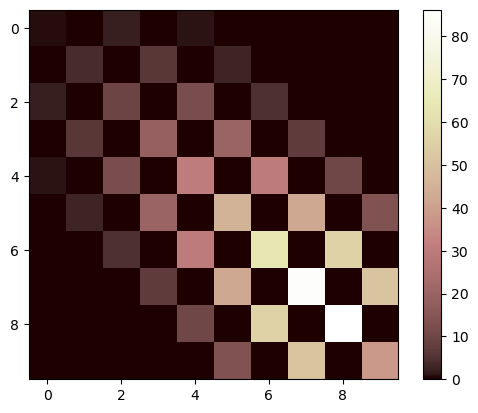

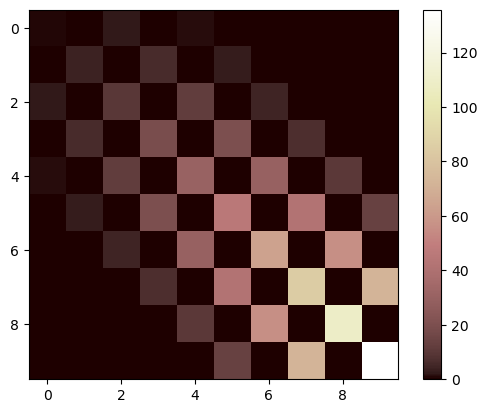

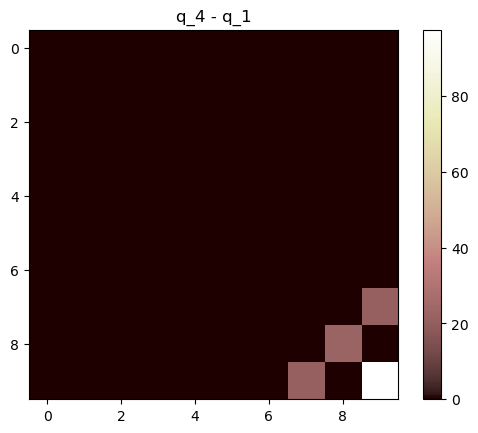

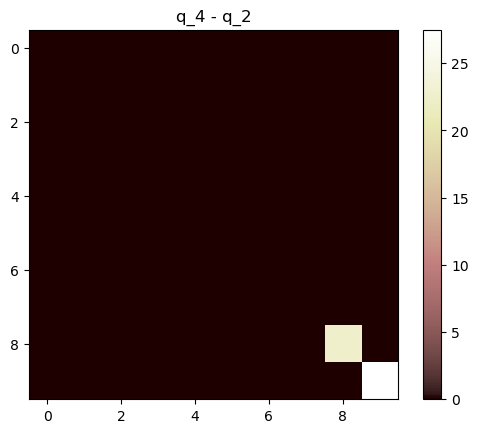

In [3]:
def delta(i,j):
    return int(i == j)

# print(delta(1,1))
# print(delta(1,2))
# print(delta(-1,1))

def q_1(n):
    q = np.zeros((n,n))
    for ind, v in np.ndenumerate(q):
        i,j = ind[0], ind[1]
        a = 0.5 * np.sqrt(i + j + 1) * delta(abs(i-j), 1)
        q[ind] += a 
    return q

def q_2(n):
    q = np.zeros((n,n))
    for ind, v in np.ndenumerate(q):
        i,j = ind[0], ind[1]
        a = np.sqrt(j * (j-1)) * delta(i, j-2)
        b = (2*j + 1) * delta(i,j)
        c = np.sqrt((j+1)*(j+2)) * delta(i, j+2)
        q[ind] += 1/2 *(a + b + c)
    return q

def q_4(n):
    q = np.zeros((n,n))
    for ind, v in np.ndenumerate(q):
        i,j = ind[0], ind[1]
        a = delta(i, j+4)
        b = 4 * (2*j + 3) * delta(i, j+2)
        c = 12 * (2*j**2 + 2*j + 1) * delta(i,j)
        d = 16 * j * (2 * j**2 - 3 * j + 1) * delta(i,j-2)
        e = 16 * j * (j**3 - 6*j**2 + 11*j - 6) * delta(i, j-4)
        q[ind] += (1/2**4) * np.sqrt(((2**i)*math.factorial(i)) / ((2**j) * math.factorial(j))) *  (a + b + c + d + e)
    return q


# print(q_1(5))
# print(q_2(5))
# print(q_4(5))

n = 10
plt.figure()
plt.imshow(np.matmul(np.matmul(q_1(n),q_1(n)),np.matmul(q_1(n),q_1(n))), cmap="pink" )
plt.colorbar()
plt.figure()
plt.imshow(np.matmul(q_2(n),q_2(n)), cmap="pink")
plt.colorbar()
plt.figure()
plt.imshow(q_4(n),cmap="pink")
plt.colorbar()

plt.figure()
plt.title('q_4 - q_1')
plt.imshow(q_4(n)-np.matmul(np.matmul(q_1(n),q_1(n)),np.matmul(q_1(n),q_1(n))),cmap="pink")
plt.colorbar()
plt.figure()
plt.title('q_4 - q_2')
plt.imshow(q_4(n)-np.matmul(q_2(n),q_2(n)),cmap="pink")
plt.colorbar()



Zdaj lahko definiramo: $H = H_0 + \lambda \cdot q^4$.

In [7]:
def H_func(n, lamb, tip=1):
    H_0 = 0.5 * np.diag([2*i+1. for i in range(0,n)])
    if tip == 1:
        H_res = H_0 + lamb * np.matmul(np.matmul(q_1(n),q_1(n)),np.matmul(q_1(n),q_1(n)))
    if tip == 2:
        H_res = H_0 + lamb * np.matmul(q_2(n),q_2(n))
    if tip == 4:
        H_res = H_0 + lamb * q_4(n)
    return H_res

def H_0_func(n):
    H_0 = 0.5 * np.diag([2*i+1. for i in range(0,n)])
    return H_0


print(H_func(6, 1, 4))
print(H_func(6, 1, 2))
print(H_func(6, 1, 1))

# plt.figure()
# plt.title("q_4")
# plt.imshow(H_func(100, 1, 4), cmap="pink")
# plt.colorbar()
# plt.figure()
# plt.title("q_2")
# plt.imshow(H_func(100, 1, 2), cmap="pink")
# plt.colorbar()
# plt.figure()
# plt.title("q_1")
# plt.imshow(H_func(100, 1, 1), cmap="pink")
# plt.colorbar()
# plt.figure()
# plt.title("q_4-q_1")
# plt.imshow(H_func(10, 1, 4)-H_func(10, 1, 1), cmap="pink")
# plt.colorbar()



[[ 1.25        0.          2.12132034  0.          1.22474487  0.        ]
 [ 0.          5.25        0.          6.12372436  0.          2.73861279]
 [ 2.12132034  0.         12.25        0.         12.12435565  0.        ]
 [ 0.          6.12372436  0.         22.25        0.         20.1246118 ]
 [ 1.22474487  0.         12.12435565  0.         35.25        0.        ]
 [ 0.          2.73861279  0.         20.1246118   0.         51.25      ]]
[[ 1.25        0.          2.12132034  0.          1.22474487  0.        ]
 [ 0.          5.25        0.          6.12372436  0.          2.73861279]
 [ 2.12132034  0.         12.25        0.         12.12435565  0.        ]
 [ 0.          6.12372436  0.         22.25        0.         20.1246118 ]
 [ 1.22474487  0.         12.12435565  0.         27.75        0.        ]
 [ 0.          2.73861279  0.         20.1246118   0.         40.75      ]]
[[ 1.25        0.          2.12132034  0.          1.22474487  0.        ]
 [ 0.          5.25    

In [ ]:


# Create a sample matrix
matrix_1 = H_func(6,1,1)
matrix_2 = H_func(6,1,2)
matrix_4 = H_func(6,1,4)

# Create a figure and axis
fig, axs = plt.subplots(1,3, figsize=(14,5.8))

# Display the matrix with imshow
color_type= 'summer_r'
norm = mpl.colors.Normalize(vmin=0, vmax=51.25)
axs[0].imshow(matrix_1, cmap=color_type,norm=norm)
axs[1].imshow(matrix_2, cmap=color_type,norm=norm)
axs[2].imshow(matrix_4, cmap=color_type,norm=norm)
axs[0].set_title(r"$\langle i|q|j\rangle$")
axs[1].set_title(r"$\langle i|q^2|j\rangle$")
axs[2].set_title(r"$\langle i|q^4|j\rangle$")


for i in range(matrix_1.shape[0]):
    for j in range(matrix_1.shape[1]):
        axs[0].text(j, i, f'{matrix_1[i, j]:.5}', va='center', ha='center', color='black')
        # ax.text(j, i, str(matrix[i, j]), va='center', ha='center', color='white')

for i in range(matrix_2.shape[0]):
    for j in range(matrix_2.shape[1]):
        axs[1].text(j, i, f'{matrix_2[i, j]:.5}', va='center', ha='center', color='black')
        # ax.text(j, i, str(matrix[i, j]), va='center', ha='center', color='white')

for i in range(matrix_4.shape[0]):
    for j in range(matrix_4.shape[1]):
        axs[2].text(j, i, f'{matrix[i, j]:.6}', va='center', ha='center', color='black')
        # ax.text(j, i, str(matrix[i, j]), va='center', ha='center', color='white')

cbar = plt.colorbar(cax)

plt.tight_layout()
plt.suptitle('Primerjava Hamiltonovih funkcij dimenzij N=6 za različne matrične elemente', fontsize=14)

plt.savefig('mat_elem_6')
plt.show()

In [ ]:
# Create a sample matrix
matrix_1 = H_func(50,1,1)[:6,:6]
matrix_2 = H_func(50,1,2)[:6,:6]
matrix_4 = H_func(50,1,4)[:6,:6]

# Create a figure and axis
fig, axs = plt.subplots(1,3, figsize=(14,5.6))

# Display the matrix with imshow
color_type= 'summer_r'
norm = mpl.colors.Normalize(vmin=0, vmax=51.25)
axs[0].imshow(matrix_1, cmap=color_type,norm=norm)
axs[1].imshow(matrix_2, cmap=color_type,norm=norm)
axs[2].imshow(matrix_4, cmap=color_type,norm=norm)
axs[0].set_title(r"$\langle i|q|j\rangle$")
axs[1].set_title(r"$\langle i|q^2|j\rangle$")
axs[2].set_title(r"$\langle i|q^4|j\rangle$")

for i in range(matrix_1.shape[0]):
    for j in range(matrix_1.shape[1]):
        axs[0].text(j, i, f'{matrix_1[i, j]:.5}', va='center', ha='center', color='black')
        # ax.text(j, i, str(matrix[i, j]), va='center', ha='center', color='white')

for i in range(matrix_2.shape[0]):
    for j in range(matrix_2.shape[1]):
        axs[1].text(j, i, f'{matrix_2[i, j]:.5}', va='center', ha='center', color='black')
        # ax.text(j, i, str(matrix[i, j]), va='center', ha='center', color='white')

for i in range(matrix_4.shape[0]):
    for j in range(matrix_4.shape[1]):
        axs[2].text(j, i, f'{matrix[i, j]:.6}', va='center', ha='center', color='black')
        # ax.text(j, i, str(matrix[i, j]), va='center', ha='center', color='white')

cbar = plt.colorbar(cax)
plt.suptitle('Primerjava Hamiltonovih funkcij dimenzij N=50 za različne matrične elemente', fontsize=14)


plt.tight_layout()
plt.savefig('mat_elem_50')
plt.show()


Sedaj se lahko lotimo problema diagonalizacije.

Ročno implementiramo eno iz med metod za iskanje lastnih vrednosti in lastnih vektorjev.

In [4]:
def Hausholder(A):
    dim = np.shape(A)[0]
    P_s = []

    A_copy = A.copy()
    for n in range(dim - 1):
        A_sub = A_copy[n:,n:].copy()
        I = np.eye(dim - n)
        w = A_sub[:,0].copy()
        w[0] += (math.copysign(1,A[:,0][0])) * la.norm(A_sub[:,0])
        P = (I - (2/ (np.vdot(w, w))) * (np.outer(w, w)))
        P_pad = np.zeros(np.shape(A))
        P_pad[:n,:n] = np.eye(n)
        P_pad[n:,n:] = P
        P_s.append(P_pad)
        A_copy = np.dot(P_pad,A_copy)
    P_final = np.eye(dim)
    for i in P_s[::-1]:
        P_final = np.matmul(i, P_final)
    return P_final, A_copy
    
def isDiag2(M):
    i, j = M.shape
    assert i == j 
    test = M.reshape(-1)[:-1].reshape(i-1, j+1)
    return ~np.any(test[:, 1:])

    #https://stackoverflow.com/questions/43884189/check-if-a-large-matrix-is-diagonal-matrix-in-python

def QR_iteracija(A,n):
    A_copy = A.copy()
    Q_s = []
    for i in range(n):
        Q, R = Hausholder(A_copy)
        Q_s.append(Q)
        A_copy = np.matmul(R,Q)
        # print(A_copy)
        if isDiag2(A_copy.round(8)):
            # print(i)
            break
    Q_res = np.eye(np.shape(A)[0])
    for i in Q_s[::-1]:
        Q_res = np.matmul(i, Q_res)
    return A_copy, Q_res
    
#gramschmidt:   https://stackoverflow.com/questions/36636214/qr-factorisation-using-modified-gram-schmidt

def gs(A):
    m = np.shape(A)[0]
    n = np.shape(A)[1]
    Q =  np.zeros((m, m))
    R =  np.zeros((n, n)) 
    for j in range(n):
        v = A[:,j]
        for i in range(j):
            R[i,j] =  np.dot(Q[:,i].T , A[:,j])   # I made an arbitrary change here!!!
            v = v.squeeze() - (R[i,j] * Q[:,i])
        R[j,j] =  np.linalg.norm(v)
        Q[:,j] = (v / R[j,j]).squeeze()
    return Q, R
    

In [5]:
#prevzete iz profesorjeve datoteke

def qr(M):
    A = np.copy(M)
    m, n = A.shape
    Q = np.eye(m)
    for i in range(n - (m == n)):
        H = np.eye(m)
        H[i:, i:] = make_householder(A[i:, i])
        Q = np.dot(Q, H)
        A = np.dot(H, A)
    return Q, A

def make_householder(a):
    #rescaling to v and sign for numerical stability
    v = a / (a[0] + np.copysign(np.linalg.norm(a), a[0]))
    v[0] = 1
    H = np.eye(a.shape[0])
    H -= (2 / np.dot(v, v)) * np.outer(v,v)
    return H

def qr_givens(M):
    A = np.copy(M)
    m, n = A.shape
    Q = np.eye(m)
    for j in range(n - (m == n)):
        for i in range(j+1,m):
            r=np.hypot(A[j,j],A[i,j])
            c=A[j,j]/r
            s=A[i,j]/r
            givensRot = np.array([[c, s],[-s,  c]])
            A[[j,i],j:] = np.dot(givensRot, A[[j,i],j:])
            Q[[j,i],:] = np.dot(givensRot, Q[[j,i],:])
    return Q.T, A


def trid_householder(M):
    A = np.copy(M)
    m, n = A.shape
    if ( m != n):
        print("need quadratic symmetric matrix")
        sys.exit(1)
    Q = np.eye(m)
    for i in range(m - 2):
        H = np.eye(m)
        H[i+1:, i+1:] = make_householder(A[i+1:, i])
        Q = np.dot(Q, H)
        A = np.dot(H, A)
        A = np.dot(A,H)
    return Q, A

def qlnr(d,e,z,tol = 1.0e-9):
    #d - diagonal values
    #e - off-tridiag values
    #z - orthogonal matrix to process further
    n=len(d)
    e=np.roll(e,-1) #reorder
    itmax=1000
    for l in range(n):
        for iter in range(itmax):
            m=n-1
            for mm in range(l,n-1):
                dd=abs(d[mm])+abs(d[mm+1])
                if abs(e[mm])+dd == dd:
                    m=mm
                    break
                if abs(e[mm]) < tol:
                    m=mm
                    break
            if iter==itmax-1:
                print ("too many iterations",iter)
                sys.exit(0)
            if m!=l:
                g=(d[l+1]-d[l])/(2.*e[l])
                r=np.sqrt(g*g+1.)
                g=d[m]-d[l]+e[l]/(g+np.sign(g)*r)
                s=1.
                c=1.
                p=0.
                for i in range(m-1,l-1,-1):
                    f=s*e[i]
                    b=c*e[i]
                    if abs(f) > abs(g):
                        c=g/f
                        r=np.sqrt(c*c+1.)
                        e[i+1]=f*r
                        s=1./r
                        c *= s
                    else:
                        s=f/g
                        r=np.sqrt(s*s+1.)
                        e[i+1]=g*r
                        c=1./r
                        s *= c
                    g=d[i+1]-p
                    r=(d[i]-g)*s+2.*c*b
                    p=s*r
                    d[i+1]=g+p
                    g=c*r-b
                    for k in range(n):
                        f=z[k,i+1]
                        z[k,i+1]=s*z[k,i]+c*f
                        z[k,i]=c*z[k,i]-s*f
                d[l] -= p
                e[l]=g
                e[m]=0.
            else:
                break
    return d,z

In [ ]:
# Preverjanje qr decompositiona

#preverjanje hitrosti:
lambs = np.linspace(0,1,5)
ns = np.arange(1,100,1)
ns = np.arange(1,1000, 100)
time_eigh = []
time_qr = []

time_hous = []
err_hous = []
for n in ns:
    H_s = []
    for lamb in lambs:
        H = H_func(n, lamb, 1)
        H_s.append(H)  
    time_hous_temp = []
    for _ in range(10):
        start_time = time.time()
        for H in H_s:
            Q,R = Hausholder(H)
        end_time = time.time()
        elapsed_time = end_time - start_time
        time_hous_temp.append(elapsed_time)
    time_hous.append(np.average(time_hous_temp)) #povprecen cas za izracun qr za 5 lamb
    err_hous.append(np.std(time_hous_temp)) #povprecen cas za izracun qr za 5 lamb
    print(n)
np.save("time_hous_100", time_hous)
np.save("err_hous_100", err_hous)


time_giv = []
err_giv = []
for n in ns:
    H_s = []
    for lamb in lambs:
        H = H_func(n, lamb, 1)
        H_s.append(H)  
    time_giv_temp = []
    for _ in range(10):
        start_time = time.time()
        for H in H_s:
            Q,R = qr_givens(H)
        end_time = time.time()
        elapsed_time = end_time - start_time
        time_giv_temp.append(elapsed_time)
    time_giv.append(np.average(time_giv_temp)) #povprecen cas za izracun qr za 5 lamb
    err_giv.append(np.std(time_giv_temp)) #povprecen cas za izracun qr za 5 lamb
    if n % 10 == 0:
        print(n)
np.save("time_giv_100", time_giv)
np.save("err_giv_100", err_giv)

time_gs = []
err_gs = []
for n in ns:
    H_s = []
    for lamb in lambs:
        H = H_func(n, lamb, 1)
        H_s.append(H)  
    time_gs_temp = []
    for _ in range(10):
        start_time = time.time()
        for H in H_s:
            Q,R = gs(H)
        end_time = time.time()
        elapsed_time = end_time - start_time
        time_gs_temp.append(elapsed_time)
    time_gs.append(np.average(time_gs_temp)) #povprecen cas za izracun qr za 50 lamb
    err_gs.append(np.std(time_gs_temp)) #povprecen cas za izracun qr za 5 lamb
    if n % 10 == 0:
        print(n)
np.save("time_gs_100", time_gs)
np.save("err_gs_100", err_gs)


time_la_qr = []
err_la_qr = []
for n in ns:
    H_s = []
    for lamb in lambs:
        H = H_func(n, lamb, 1)
        H_s.append(H)  
    time_la_qr_temp = []
    for _ in range(10):
        start_time = time.time()
        for H in H_s:
            Q,R = la.qr(H)
        end_time = time.time()
        elapsed_time = end_time - start_time
        time_la_qr_temp.append(elapsed_time)
    time_la_qr.append(np.average(time_la_qr_temp)) #povprecen cas za izracun qr za 5 lamb
    err_la_qr.append(np.std(time_la_qr_temp)) #povprecen cas za izracun qr za 5 lamb
    if n % 10 == 0:
        print(n)
np.save("time_la_qr_100", time_la_qr)
np.save("err_la_qr_100", err_la_qr)



In [ ]:
# time_hous  = np.load("time_hous_100.npy")
# time_giv  = np.load("time_giv_100.npy")
# time_gs  = np.load("time_gs_100.npy")
# time_la_qr  = np.load("time_la_qr_100.npy")
# ns = np.arange(1,100,1)
ns = np.arange(1,1000, 100)
time_hous  = np.load("time_hous_1000.npy")
time_giv  = np.load("time_giv_1000.npy")
time_gs  = np.load("time_gs_1000.npy")
time_la_qr  = np.load("time_la_qr_1000.npy")
err_hous = np.load("err_hous_1000.npy")
err_giv = np.load("err_giv_1000.npy")
err_gs = np.load("err_gs_1000.npy")
err_la_qr = np.load("err_la_qr_1000.npy")




plt.errorbar(ns, time_hous,yerr=err_hous, linestyle='-', marker='.', label='Hausholder')
plt.errorbar(ns, time_giv,yerr=err_giv, linestyle='-', marker='.',label='Givens')
plt.errorbar(ns, time_gs,yerr=err_gs, linestyle='-', marker='.', label='Gramm-Schmidt')
plt.errorbar(ns, time_la_qr,yerr=err_la_qr, linestyle='-', marker='.',label='la.qr()')
# plt.plot(ns, time_gs)
# plt.plot(ns, time_giv)
# plt.plot(ns, time_la_qr)
plt.yscale('log')
plt.xscale('log')
plt.title('Primerjava časovne zahtevnosti QR dekompozicij')
plt.xlabel('Dimenzija H matrike')
plt.ylabel(r't (QR dekompozicije za 5 različnh $\lambda$) [s]')
plt.grid()
plt.legend()
plt.savefig('qr_decomp_cas_1000')

In [ ]:

def gen_log_space(limit, n):
    result = [1]
    if n>1:  # just a check to avoid ZeroDivisionError
        ratio = (float(limit)/result[-1]) ** (1.0/(n-len(result)))
    while len(result)<n:
        next_value = result[-1]*ratio
        if next_value - result[-1] >= 1:
            # safe zone. next_value will be a different integer
            result.append(next_value)
        else:
            # problem! same integer. we need to find next_value by artificially incrementing previous value
            result.append(result[-1]+1)
            # recalculate the ratio so that the remaining values will scale correctly
            ratio = (float(limit)/result[-1]) ** (1.0/(n-len(result)))
    # round, re-adjust to 0 indexing (i.e. minus 1) and return np.uint64 array
    return np.array(list(map(lambda x: round(x)-1, result)), dtype=np.uint64)

ns = gen_log_space(101, 30)
print(ns)


lambs = np.linspace(0,1,3)
# ns = np.arange(1,100,1)
# extended = np.array([200, 500, 1000])
# ns = np.concatenate((ns,extended))
# lambs=[0.5]
print(ns)
time_eigh = []
err_eigh = []

for n in ns:
    H_s = []
    for lamb in lambs:
        H = H_func(n, lamb, 1)
        H_s.append(H)  
    time_eigh_temp = []
    for _ in range(6):
        start_time = time.time()
        for H in H_s:
            res = QR_iteracija(H,10000)
        end_time = time.time()
        elapsed_time = end_time - start_time
        time_eigh_temp.append(elapsed_time)
    time_eigh.append(np.average(time_eigh_temp)) #povprecen cas za izracun qr za 50 lamb
    err_eigh.append(np.std(time_eigh_temp)) #povprecen cas za izracun qr za 5 lamb
    if n % 10 == 0:
        print(n)
np.save("time_eigh_10", time_eigh)
np.save("err_eigh_10", err_eigh)


time_la_eigh = []
err_la_eigh = []
for n in ns:
    H_s = []
    for lamb in lambs:
        H = H_func(n, lamb, 1)
        H_s.append(H)  
    time_la_eigh_temp = []
    for _ in range(6):
        start_time = time.time()
        for H in H_s:
            res = la.eigh(H)
        end_time = time.time()
        elapsed_time = end_time - start_time
        time_la_eigh_temp.append(elapsed_time)
    time_la_eigh.append(np.average(time_la_eigh_temp)) #povprecen cas za izracun qr za 5 lamb
    err_la_eigh.append(np.std(time_la_eigh_temp)) #povprecen cas za izracun qr za 5 lamb
    if n % 10 == 0:
        print(n)
np.save("time_la_eigh_10", time_la_eigh)
np.save("err_la_eigh_10",err_la_eigh)

In [ ]:
ns = np.arange(1,100,1)
extended = np.array([200, 500, 1000])
ns = np.concatenate((ns,extended))
# ns = ns[:99]
ns = gen_log_space(101, 30)

time_eigh  = np.load("time_eigh_10.npy")
time_la_eigh  = np.load("time_la_eigh_10.npy")

err_eigh = np.load("err_eigh_10.npy")
err_la_eigh = np.load("err_la_eigh_10.npy")

plt.errorbar(ns, time_eigh,yerr=err_eigh, linestyle='-', marker='.', label='QR iteracija')
plt.errorbar(ns, time_la_eigh,yerr=err_la_eigh, linestyle='-', marker='.',label='np.linalg.eigh()')

plt.yscale('log')
plt.xscale('log')
plt.title('Primerjava časovne zahtevnosti diagonalizacije')
plt.xlabel('Dimenzija H matrike')
plt.ylabel(r't (diagonalizacije za 5 različnh $\lambda$) [s]')
plt.grid()
plt.legend()
plt.savefig('diag_cas_100')

H_0 [0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5]
0.5
[ 0.696176  2.324406  4.327525  6.578402  9.028779 11.648721 14.417669
 17.320424 20.345193 23.482505]
[ 0.696176  2.324406  4.327525  6.578402  9.028779 11.648721 14.417669
 17.320424 20.345193 23.482505]
[ 0.696176  2.324406  4.327525  6.578402  9.028779 11.648721 14.417669
 17.320424 20.345193 23.482505]


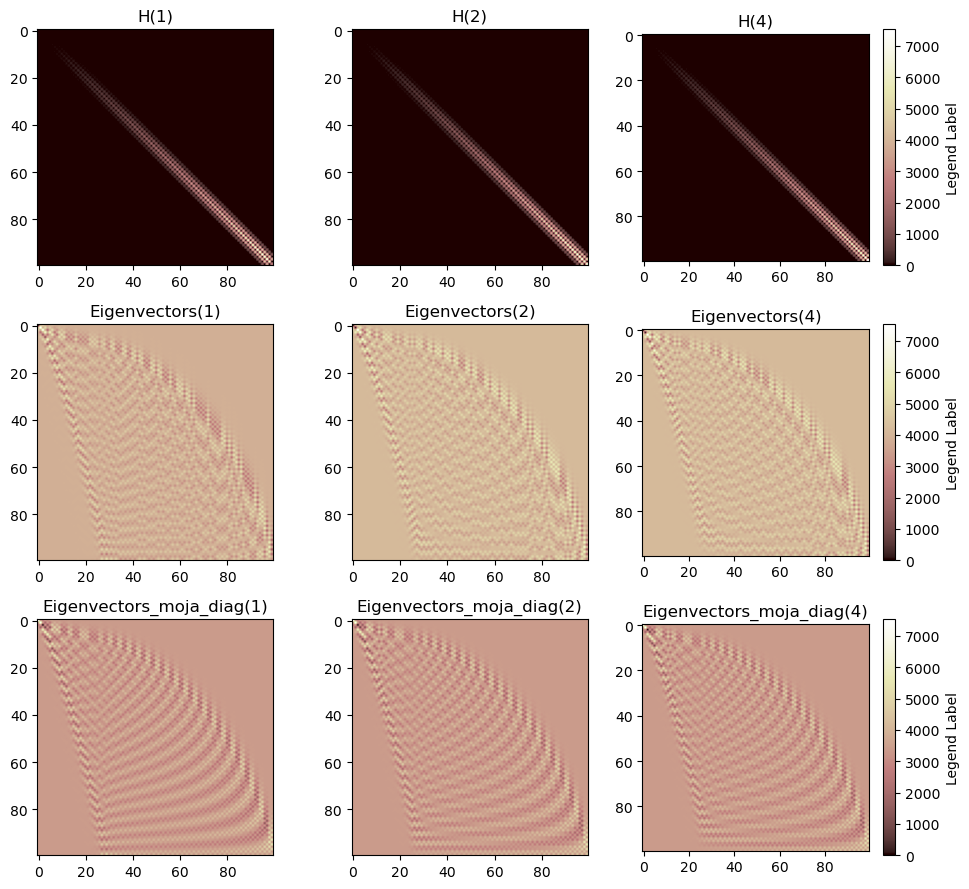

0.1
[ 0.559146  1.769503  3.138624  4.628883  6.220301  7.899767  9.65784
 11.487316 13.382475 15.338642]
[ 0.559146  1.769503  3.138624  4.628883  6.220301  7.899767  9.65784
 11.487316 13.382475 15.338642]
[ 0.559146  1.769503  3.138624  4.628883  6.220301  7.899767  9.65784
 11.487316 13.382475 15.338642]


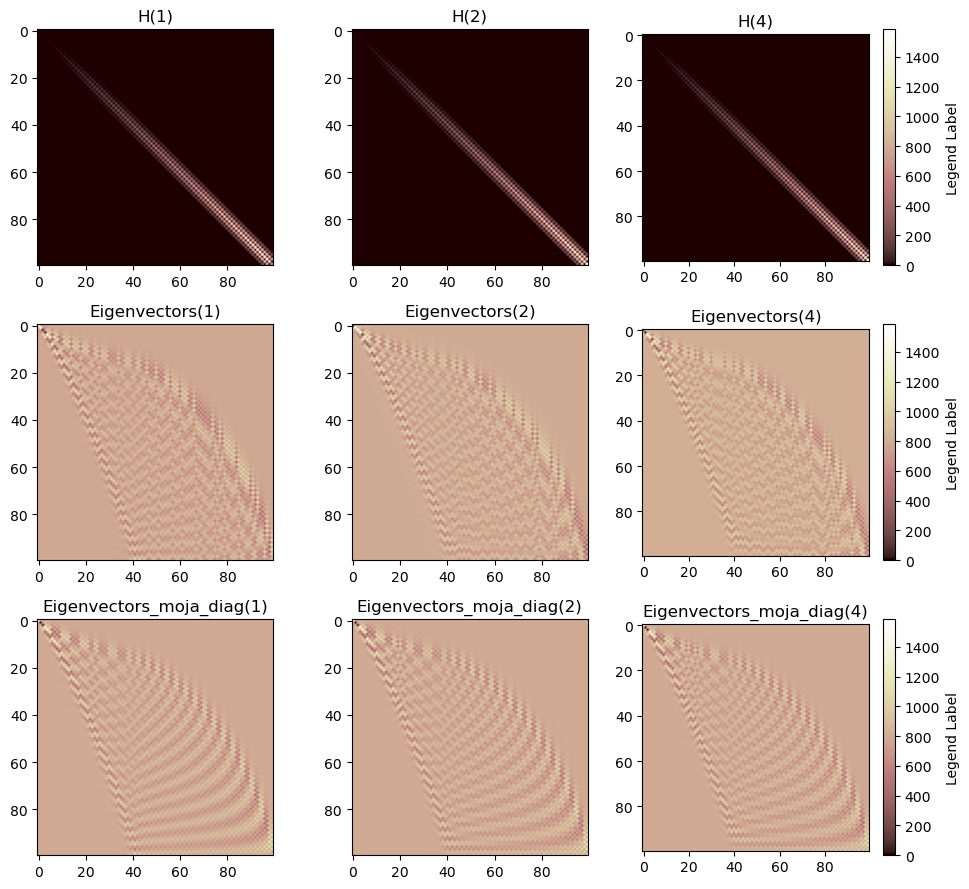

In [46]:

# Define the range of lamb values
lamb_values = np.linspace(0, 1, 3)
lamb_values = [0.5,0.1,0.3,0.7,0]
lamb_values = [0.5,0.1]#,0.3,0.7,0]
n = 100
print("H_0", np.diagonal(H_0_func(n))[:10])
for lamb in lamb_values:
    print(lamb)

    fig, axs = plt.subplots(3, 3, figsize=(10, 9))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)  # Adjust the spacing between subplots

    for i, power in enumerate([1, 2, 4]):
        H = H_func(n, lamb, power)

        res = la.eigh(H)
        # Q,R = Hausholder(H)
        # print("Q",Q.round(6))
        # print("R",R.round(6))
        # print("A", np.matmul(Q,R).round(6))

        D, Q = QR_iteracija(H,100)
        res_2 = np.diag(D.round(6)), Q
        sort_indices = np.argsort(np.abs(res_2[0]))

        # for vector in res[1][:5].copy():
        #     print(la.norm(vector))
        # print(res[1].T[sort_indices][:5])
        # print(res[1][sort_indices][:5])
        print(res_2[0][sort_indices][:10])

        # Plot H matrix in the upper row
        axs[0, i].imshow(H, cmap='viridis')
        axs[0, i].set_title(f'H({power})')

        im = axs[0, i].imshow(H, cmap='pink')

        # Plot eigenvectors in the lower row
        ax_eigen = axs[1, i]
        ax_eigen.imshow(res[1], cmap='pink')
        ax_eigen.set_title(f'Eigenvectors({power})')
        # im = axs[1, i].imshow(res[1].T[sort_indices].T, cmap='viridis')
        axs[2, i].imshow(res_2[1].T[sort_indices].T, cmap='pink')
        axs[2, i].set_title(f'Eigenvectors_moja_diag({power})')
    colorbar = plt.colorbar(im, ax=axs[0, 2], label='Legend Label')
    colorbar = plt.colorbar(im, ax=axs[1, 2], label='Legend Label')
    colorbar = plt.colorbar(im, ax=axs[2, 2], label='Legend Label')
    plt.tight_layout()
    plt.show()


In [198]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Define the range of lamb values
lamb_values = np.linspace(0, 1, 3)
lamb_values = [0.5,0.1,0.3,0.7,0]
lamb_values = [0,0.0001,0.001,0.01,0.5,1.0]#,0.3,0.7,0]
n = 100
# print("H_0", np.diagonal(H_0_func(n))[:10])
# # for lamb in lamb_values:
#     print(lamb)

fig, axs = plt.subplots(2, 3, figsize=(12, 6.5))
fig.suptitle('Matrike lastnih stanj za anharmonski oscilator')
plt.subplots_adjust(wspace=0.3, hspace=0.3)  # Adjust the spacing between subplots


power = 1
cmap = cm.get_cmap('pink')
for i, pos in enumerate([(0,0),(0,1),(0,2),(1,0), (1,1), (1,2)]):
    divider = make_axes_locatable(axs[pos])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    lamb = lamb_values[i]
    H = H_func(n, lamb, power)
    res = la.eigh(H)
    print(res_2[0][sort_indices][:10])

    # Plot H matrix in the upper row
    data = res[1]
    print(np.min(data))
    im = axs[pos].imshow(data, cmap=cmap)
    # im = axs[pos].imshow(data, cmap=cmap, norm=LogNorm(vmin=10**(-10), clip=bool))
    axs[pos].set_title(r'$\lambda = $' + f'{lamb}')

    fig.colorbar(im, cax=cax, orientation='vertical')

plt.subplots_adjust(bottom=0.5)
plt.tight_layout()
plt.savefig("matrike_lastnih_stanj")
plt.show()






/var/folders/1l/8qyzjsmx231gm5fbpjts8n6c0000gn/T/ipykernel_31807/130727309.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('pink')


[ 0.559146  1.769503  3.138624  4.628883  6.220301  7.899767  9.65784
 11.487316 13.382475 15.338642]
0.0
[ 0.559146  1.769503  3.138624  4.628883  6.220301  7.899767  9.65784
 11.487316 13.382475 15.338642]
-0.9999998041643942
[ 0.559146  1.769503  3.138624  4.628883  6.220301  7.899767  9.65784
 11.487316 13.382475 15.338642]
-0.9999951826504999
[ 0.559146  1.769503  3.138624  4.628883  6.220301  7.899767  9.65784
 11.487316 13.382475 15.338642]
-0.9984788270908825
[ 0.559146  1.769503  3.138624  4.628883  6.220301  7.899767  9.65784
 11.487316 13.382475 15.338642]
-0.9837613311895962
[ 0.559146  1.769503  3.138624  4.628883  6.220301  7.899767  9.65784
 11.487316 13.382475 15.338642]
-0.9707959708110708


In [27]:
lambs = np.linspace(0,1,100)
lambs= [1]
Ns = np.arange(10,100)

all_H_ref = []
for ind_1, lamb in enumerate(lambs):
    H_ref = H_func(1000, lamb, 1)
    res_ref = la.eigh(H_ref)
    all_H_ref.append(res_ref)


all_H_1_a = []
all_H_2_a = []
all_H_4_a = []
for ind_1, lamb in enumerate(lambs):
    all_H_1 = []
    all_H_2 = []
    all_H_4 = []
    for ind_2, N in enumerate(Ns):
        H_1 = H_func(N, lamb, 1)
        H_2 = H_func(N, lamb, 2)
        H_4 = H_func(N, lamb, 4)
        res1 = la.eigh(H_1)
        res2 = la.eigh(H_2)
        res4 = la.eigh(H_4)
        all_H_1.append(res1)
        all_H_2.append(res2)
        all_H_4.append(res4)
    all_H_1_a.append(all_H_1)
    all_H_2_a.append(all_H_2)
    all_H_4_a.append(all_H_4)

     #predvidevam da sta metodi q]2 in q]4 priblizka saj gre za popravek, ki pride iz razvoje vrednosti q, kar pomeni da razvijamo matrični element q na 4

/var/folders/1l/8qyzjsmx231gm5fbpjts8n6c0000gn/T/ipykernel_42026/1466171202.py:48: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmaps = [cm.get_cmap('Greys'), cm.get_cmap('Blues'), cm.get_cmap('Greens')]


<Figure size 1500x500 with 0 Axes>

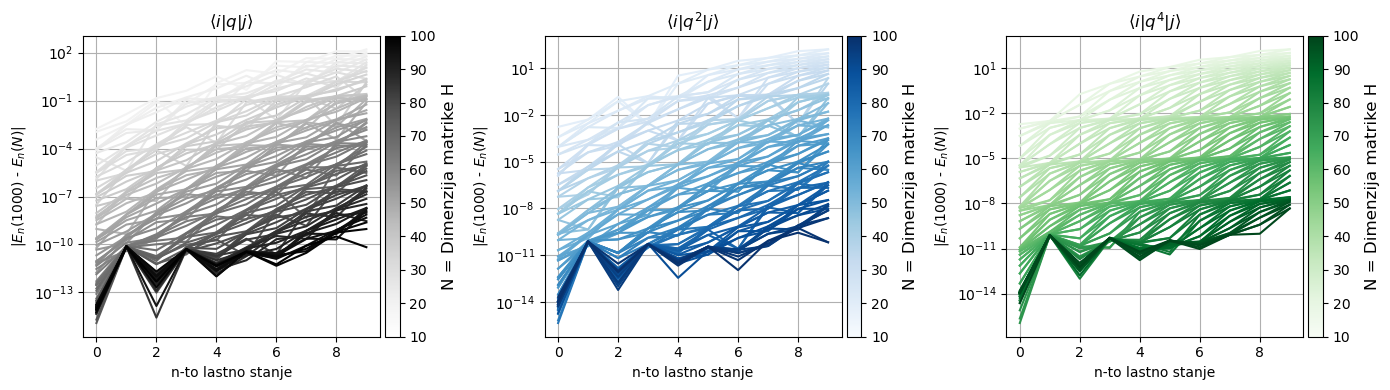

In [97]:
ns = np.arange(0,10,1)

from matplotlib.colors import Normalize

cmaps = [cm.get_cmap('Greys'), cm.get_cmap('Blues'), cm.get_cmap('Greens')]
custom_ticks = np.arange(10,101,10)
# Create the first subplot
plt.figure(figsize=(15, 5))
fig, axs = plt.subplots(1, 3, figsize=(14, 4))

for i in all_H_1_a:
    for ind, j in enumerate(i[:]):  # Limit the number of points to 10 for each plot
        color = cmaps[0](Ns[ind] / 100)
        axs[0].plot(ns, abs(j[0][:10]  - all_H_ref[0][0][:10]), color=color)
        axs[0].set_yscale('log')
    
axs[0].set_title(r'$\langle i|q|j\rangle$')
axs[0].set_xlabel(r'n-to lastno stanje')
axs[0].set_ylabel(r'|$E_n(1000)$ - $E_n(N)$|')
axs[0].grid(True)
divider = make_axes_locatable(axs[0])
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = plt.colorbar(cm.ScalarMappable(cmap=cmaps[0], norm=norm), cax=cax)
cbar.set_label(r'N = Dimenzija matrike H', fontsize=12)  # Set a label for the colorbar


# Create the second subplot
# plt.subplot(132)  # 1 row, 3 columns, second subplot
for i in all_H_2_a:
    for ind, j in enumerate(i[:]):  # Limit the number of points to 10 for each plot
        color = cmaps[1](Ns[ind] / 100)
        axs[1].plot(ns, abs(j[0][:10]  - all_H_ref[0][0][:10]), color=color)
        axs[1].set_yscale('log')
axs[1].set_title(r'$\langle i|q^2|j\rangle$')
axs[1].set_xlabel(r'n-to lastno stanje')
axs[1].set_ylabel(r'|$E_n(1000)$ - $E_n(N)$|')
axs[1].grid(True)
divider = make_axes_locatable(axs[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = plt.colorbar(cm.ScalarMappable(cmap=cmaps[1], norm=norm), cax=cax)
cbar.set_label(r'N = Dimenzija matrike H', fontsize=12)  # Set a label for the colorbar

# Create the third subplot
plt.subplot(133)  # 1 row, 3 columns, third subplot
for i in all_H_4_a:
    for ind, j in enumerate(i[:]):  # Limit the number of points to 10 for each plot
        color = cmaps[2](Ns[ind] / 100)
        axs[2].plot(ns, abs(j[0][:10] - all_H_ref[0][0][:10]), color=color)
        axs[2].set_yscale('log')
axs[2].set_title(r'$\langle i|q^4|j\rangle$')
axs[2].set_xlabel(r'n-to lastno stanje')
axs[2].set_ylabel(r'|$E_n(1000)$ - $E_n(N)$|')
axs[2].grid(True)
divider = make_axes_locatable(axs[2])
cax = divider.append_axes('right', size='5%', pad=0.05)
norm = Normalize(vmin=10, vmax=100) 
cbar = plt.colorbar(cm.ScalarMappable(cmap=cmaps[2], norm=norm), cax=cax)
cbar.set_label(r'N = Dimenzija matrike H', fontsize=12)  # Set a label for the colorbar
cbar.set_ticks(custom_ticks)
cbar.update_ticks()

plt.tight_layout()
plt.savefig('q_elementi_primerjava')
plt.show()






In [25]:
# np.save("all_H_1", all_H_1_a)
# np.save("all_H_2", all_H_2_a)
# np.save("all_H_4", all_H_4_a)

En_1 = []
En_2 = []
En_4 = []
for i in all_H_1_a:
    En_1t = []
    for j in i:
        En_1t.append(j[0])
    En_1.append(En_1t)
for i in all_H_2_a:
    En_2t = []
    for j in i:
        En_2t.append(j[0])
    En_2.append(En_2t)
for i in all_H_4_a:
    En_4t = []
    for j in i:
        En_4t.append(j[0])
    En_4.append(En_4t)

# np.save("all_H_1", En_1)
# np.save("all_H_2", En_2)
# np.save("all_H_4", En_4)
# print(En_1)
    # plt.plot()

In [ ]:
for En in En_1:
    

/var/folders/1l/8qyzjsmx231gm5fbpjts8n6c0000gn/T/ipykernel_31807/2397900245.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('pink')


0
10
20
30
40
50
60
70
80
90


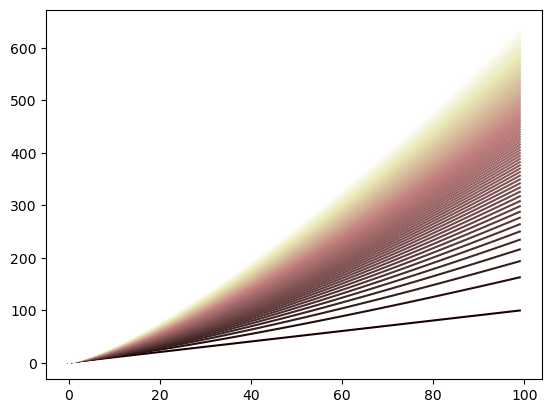

In [106]:
#narišimo še lastne energije


power = 1
cmap = cm.get_cmap('pink')
lambs = np.linspace(0,1,100)
plt.figure()
n = 1000
Ens = []
for ind,lamb in enumerate(lambs):
    H = H_func(n, lamb, power)
    res = la.eigh(H)
    En = res[0]
    Ens.append(En)
    color = cmap(lambs[:][ind])
    plt.plot(np.arange(0,len(En[:100]),1),En[:100],color=color)
    if ind % 10 ==0 :
        print(ind)
np.save("Ens_n_1000_1", Ens)








/var/folders/1l/8qyzjsmx231gm5fbpjts8n6c0000gn/T/ipykernel_31807/1415606007.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('copper_r')


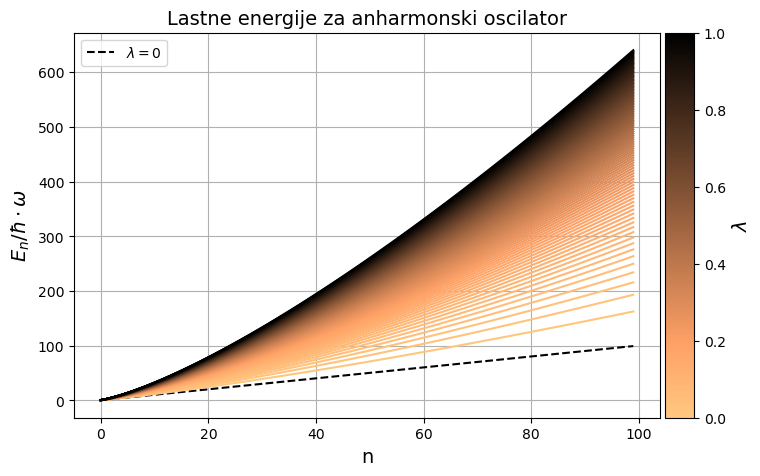

In [378]:
Ens = np.load("Ens_n_1000.npy")
cmap = cm.get_cmap('copper_r')
csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Helvetica'}
# cax = plt.gca()
lambs = np.linspace(0,1,100)
fig, axs = plt.subplots(1, 1, figsize=(8, 5))
for ind,En in enumerate(Ens):
    if lambs[ind] == 0:
        axs.plot(np.arange(0,len(En[:100]),1),En[:100],color="black", linestyle='--',label=r'$\lambda=0$')
    else:
        color = cmap(lambs[:][ind])
        axs.plot(np.arange(0,len(En[:100]),1),En[:100],color=color)

plt.xlabel('n', fontsize=14)
plt.ylabel(r'$E_n/\hbar \cdot \omega$', fontsize=14)
plt.title("Lastne energije za anharmonski oscilator", fontsize=14)
plt.legend()
plt.grid()

divider = make_axes_locatable(axs)
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(cm.ScalarMappable( cmap=cmap),cax=cax, ax=axs, label=r"$\lambda$")
cbar.set_label(r'$\lambda$', fontsize=14)
plt.savefig("lastne_en_anh")







Sedaj se lahko ukvarjamo še z lastnimi funkcijami, ti. Hermitovi polinomi.

In [ ]:
def wave_function(n,q):
    k = (2**n * math.factorial(n) * np.sqrt(np.pi)) ** (-1/2)
    wf = k *np.exp(-q**2 / 2) * scipy.special.eval_hermite(n, q)
    return wf

csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Helvetica'}
q = np.linspace(-5,5,1000)
n = 10

plt.figure(figsize=(8,6))
data = np.array([wave_function(i,q) for i in range(n)])
dy = (data.max() - data.min())

for ind,d in enumerate(data):
    plt.plot(q,1/2 + d + ind*dy)
    plt.yticks([1/2 + i*dy for i in range(n)], labels=[1/2 + i for i in range(n)])
    
plt.ylabel(r'$E_n/\hbar \cdot \omega$', fontsize=12)
plt.xlabel("q", fontsize=12)
plt.grid(axis="y")
plt.title("Lastne funkcije za harmonski potencial",fontsize=14)
plt.savefig("lastne_harmonski")



In [ ]:

csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Helvetica'}
cmap = get_cmap('copper_r') 


q = np.linspace(-5,5,1000)
n = 6
lambs = np.linspace(0,1,100)
alpha = np.linspace(0.3,1,100)[::-1]
all_VFs = [] 
power = 1

for lamb in lambs:
    H = H_func(n, lamb, power)
    res = la.eigh(H)

    # D, Q = QR_iteracija(H,100)
    # res = np.diag(D.round(6)), Q
    eigenval = res[0]
    eigenvec = res[1]

    # plt.plot(q, wave_function(0, q))  # Plot the reference wave function

    VFs_0 = np.array([wave_function(i, q) for i in range(n)])
    
    for i in range(len(eigenvec.T)):
        if eigenvec.T[i][i] < 0:
            eigenvec.T[i] = -eigenvec.T[i]
    
    VFs = np.matmul(eigenvec.T, VFs_0)
    all_VFs.append(VFs)
all_VFs = np.array(all_VFs)


plt.figure(figsize=(8,12))
data = all_VFs
# data = np.array([wave_function(i,q) for i in range(n)])
dy = (data.max() - data.min())

print(np.shape(data))

for ind1,d in enumerate(data):
    # print(len(d))
    for ind2,dd in enumerate(d):
        if lambs[ind1] == 0:
            color = cmap(lambs[:][ind1])
            if ind2 == 0:
                plt.plot(q, dd + ind2*dy,color="black", linestyle='--', zorder=np.inf, label=r'$\lambda=0$')
            else:
                plt.plot(q, dd + ind2*dy,color="black", linestyle='--', zorder=np.inf)

        else:
            color = cmap(lambs[:][ind1])
            plt.plot(q,dd + ind2*dy,color=color,alpha=alpha[ind1],zorder = 1000-ind1)
plt.legend()
plt.yticks([i*dy for i in range(n)], labels=[f'|{i}⟩' for i in range(n)], fontsize=12)
scalarmappaple = cm.ScalarMappable(cmap=cmap)
cbar = plt.colorbar(scalarmappaple, orientation='horizontal', label=r'$\lambda$', pad=0.08)
cbar.set_label(r'$\lambda$', fontsize=14)
cbar.ax.tick_params(labelsize=12) 

plt.xticks(fontsize=12)
plt.ylabel('Lastna stanja', fontsize=14)
plt.xlabel("q", fontsize=14)
plt.grid(axis="y")
plt.title("Lastne funkcije za anharmonski potencial",fontsize=14)
plt.savefig("lastne_anharmonski",bbox_inches='tight')






Analiziramo še vpliv dimenzije na natančnost

In [ ]:
Ens = np.load('Ens_n_1000.npy')

/var/folders/1l/8qyzjsmx231gm5fbpjts8n6c0000gn/T/ipykernel_31807/3692038141.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('pink')


10
11
12
13
14
15
20
25
30
35
40
50
100
1000


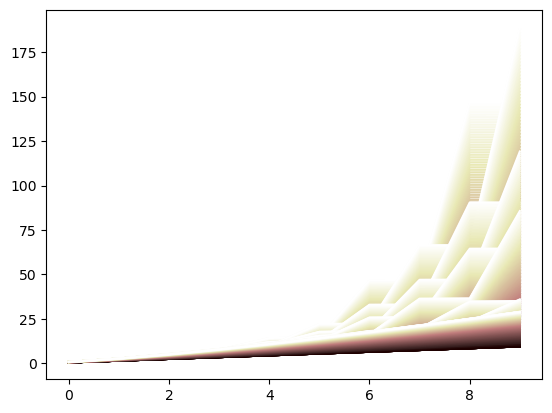

In [155]:
power = 1
cmap = cm.get_cmap('pink')
lambs = np.linspace(0,1,100)
plt.figure()
n = 1000
ns = [10,11,12,13,14,15,20,25,30,35,40,50,100,1000]
All_Ens = []
power=1
for n in ns:
    Ens = []
    for ind,lamb in enumerate(lambs):
        H = H_func(n, lamb, power)
        res = la.eigh(H)
        En = res[0]
        Ens.append(En)
        color = cmap(lambs[:][ind])
        plt.plot(np.arange(0,len(En[:10]),1),En[:10],color=color)
        # if ind % 10 ==0 :
        #     print(ind)
    All_Ens.append(Ens)
    print(n)
np.save("All_ens_1", All_Ens)
np.save("All_ens_1_ns", ns)

/var/folders/1l/8qyzjsmx231gm5fbpjts8n6c0000gn/T/ipykernel_31807/1949555827.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('copper_r')
/var/folders/1l/8qyzjsmx231gm5fbpjts8n6c0000gn/T/ipykernel_31807/1949555827.py:124: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmaps = [cm.get_cmap('Greys'), cm.get_cmap('Blues'), cm.get_cmap('Greens'), cm.get_cmap('Reds')]


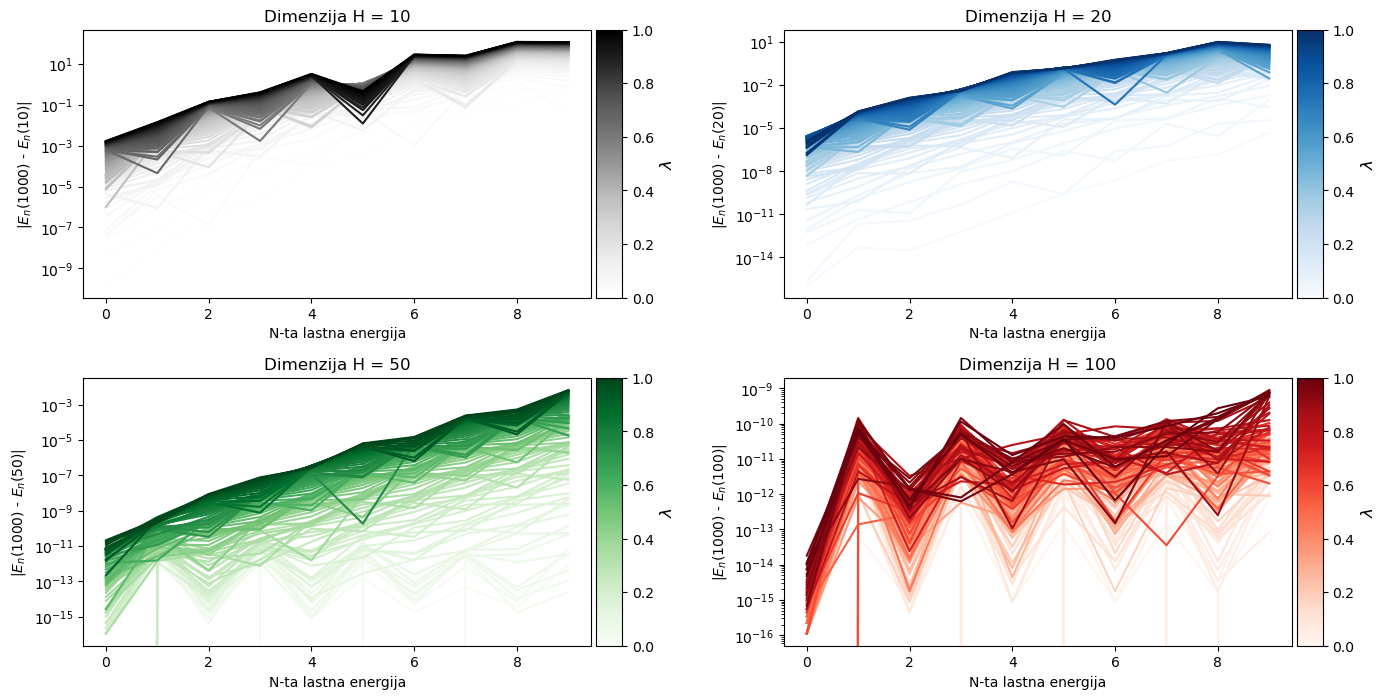

In [368]:
All_Ens_c = np.load("All_ens_1.npy",allow_pickle=True)
ns = np.load("All_ens_1_ns.npy")
cmap = cm.get_cmap('copper_r')
lambs = np.linspace(0,1,100)
dim = [10,11,12,13,14,15,20,25,30,35,40,50,100,1000]



indices = [0,6,11,12]
All_Ens_plot = All_Ens_c[indices]

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 8))
fig.subplots_adjust(wspace=0.3, hspace=0.3)  # Adjust the spacing between subplots

# Define the colormaps
cmaps = [cm.get_cmap('Greys'), cm.get_cmap('Blues'), cm.get_cmap('Greens'), cm.get_cmap('Reds')]

for ind_1, i in enumerate(All_Ens_plot):
    for ind, lamb in enumerate(lambs):
        ref = All_Ens_c[-1][ind][:10]
        ns = np.arange(0, 10, 1)
        color = cmaps[ind_1](lambs[ind])
        row = ind_1 // 2  # Determine the row for the subplot
        col = ind_1 % 2  # Determine the column for the subplot
        axs[row, col].plot(ns, np.abs(i[ind][:10] - ref), color=color)

    # Create an individual colorbar for each colormap
    divider = make_axes_locatable(axs[row, col])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = plt.colorbar(cm.ScalarMappable(cmap=cmaps[ind_1]), cax=cax)
    cbar.set_label(r'$\lambda$', fontsize=12)  # Set a label for the colorbar

    axs[row, col].set_title(f'Dimenzija H = {np.array(dim)[indices][ind_1]}')
    axs[row, col].set_xlabel('N-ta lastna energija')
    axs[row, col].set_ylabel(r'|$E_n(1000)$ - $E_n$(' + f'{np.array(dim)[indices][ind_1]})|')

# Set a logarithmic y-axis scale for all subplots
for ax_row in axs:
    for ax in ax_row:
        ax.set_yscale('log')

# Show the plot
plt.savefig('vpliv_N_posam')
plt.show()

/var/folders/1l/8qyzjsmx231gm5fbpjts8n6c0000gn/T/ipykernel_31807/92703143.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('gist_rainbow')


1.0


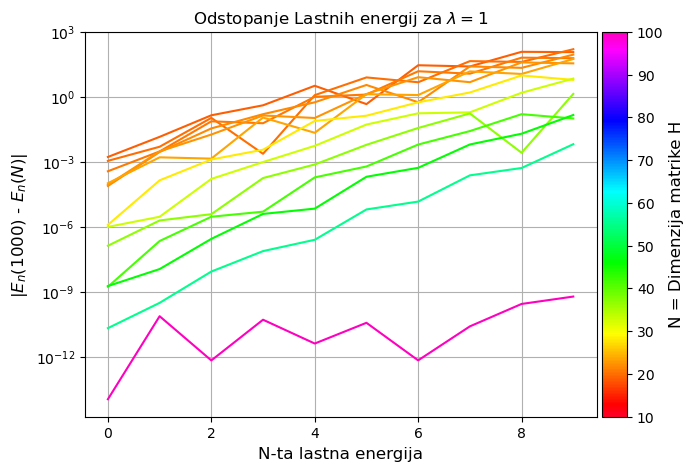

In [377]:
csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Helvetica'}
ref = All_Ens_c[-1][ind_lamb][:10]
lamb_ind = -1
cmap = get_cmap('gist_rainbow')
fig, axs = plt.subplots(1, 1, figsize=(7, 5))
dim = [10,11,12,13,14,15,20,25,30,35,40,50,100]#1000]
norm = mpl.colors.Normalize(vmin=min(dim), vmax=max(dim))
print(lambs[lamb_ind])
log_norm = LogNorm(vmin=min(dim), vmax=max(dim))

for ind_1, i in enumerate(All_Ens_c[:-1]):
    ref = All_Ens_c[-1][lamb_ind][:10]
    ns = np.arange(0, 10, 1)
    color = cmap(dim[ind_1]/100)
    axs.plot(ns, np.abs(i[lamb_ind][:10] - ref), color=color)
    
# plt.xscale('log')
plt.yscale('log')
plt.xlabel('N-ta lastna energija',fontsize=12)
plt.ylabel(r'|$E_n(1000)$ - $E_n(N)$|',fontsize=12)
plt.grid()
plt.title(r'Odstopanje Lastnih energij za $\lambda = 1$')

divider = make_axes_locatable(axs)
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = plt.colorbar(cm.ScalarMappable(cmap=cmap,norm=norm), cax=cax)
cbar.set_label(r'N = Dimenzija matrike H', fontsize=12)  # Set a label for the colorbar

plt.savefig('odstopanje_N_lamb_1')

In [381]:
def H_func_2(n, lamb, tip=1):
    H_0 = 0.5 * np.diag([2*i+1. for i in range(0,n)])
    if tip == 1:
        H_res = H_0  - 5/2 * np.matmul(q_1(n),q_1(n)) + 1/10 * np.matmul(np.matmul(q_1(n),q_1(n)),np.matmul(q_1(n),q_1(n)))
    return H_res

power = 1
cmap = cm.get_cmap('pink')
lambs = np.linspace(0,1,10)
plt.figure()
n = 100
Ens = []
for ind,lamb in enumerate(lambs):
    H = H_func_2(n, lamb, power)
    res = la.eigh(H)
    En = res[0]
    Ens.append(En)
    color = cmap(lambs[:][ind])
    plt.plot(np.arange(0,len(En[:100]),1),En[:100],color=color)
    if ind % 10 ==0 :
        print(ind)    

/var/folders/1l/8qyzjsmx231gm5fbpjts8n6c0000gn/T/ipykernel_31807/2968675797.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('pink')


0


In [279]:
# Define the range of lamb values
lamb_values = np.linspace(0, 1, 3)
lamb_values = [0.5,0.1,0.3,0.7,0]
lamb_values = [0,0.0001,0.001,0.01,0.5,1.0]#,0.3,0.7,0]
n = 100

fig, axs = plt.subplots(2, 3, figsize=(12, 6.5))
fig.suptitle('Matrike lastnih stanj za anharmonski oscilator')
plt.subplots_adjust(wspace=0.3, hspace=0.3)  # Adjust the spacing between subplots


power = 1
cmap = cm.get_cmap('pink')
for i, pos in enumerate([(0,0),(0,1),(0,2),(1,0), (1,1), (1,2)]):
    divider = make_axes_locatable(axs[pos])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    lamb = lamb_values[i]
    H = H_func_2(n, lamb, power)
    res = la.eigh(H)
    # Plot H matrix in the upper row
    data = res[1]
    im = axs[pos].imshow(data, cmap=cmap)

    axs[pos].set_title(r'$\lambda = $' + f'{lamb}')

    fig.colorbar(im, cax=cax, orientation='vertical')

plt.subplots_adjust(bottom=0.5)
plt.tight_layout()
plt.show()

/var/folders/1l/8qyzjsmx231gm5fbpjts8n6c0000gn/T/ipykernel_31807/1316314144.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('pink')


[ 0.559146  1.769503  3.138624  4.628883  6.220301  7.899767  9.65784
 11.487316 13.382475 15.338642]
-0.6287561601921595
[ 0.559146  1.769503  3.138624  4.628883  6.220301  7.899767  9.65784
 11.487316 13.382475 15.338642]
-0.6287561601921595
[ 0.559146  1.769503  3.138624  4.628883  6.220301  7.899767  9.65784
 11.487316 13.382475 15.338642]
-0.6287561601921595
[ 0.559146  1.769503  3.138624  4.628883  6.220301  7.899767  9.65784
 11.487316 13.382475 15.338642]
-0.6287561601921595
[ 0.559146  1.769503  3.138624  4.628883  6.220301  7.899767  9.65784
 11.487316 13.382475 15.338642]
-0.6287561601921595
[ 0.559146  1.769503  3.138624  4.628883  6.220301  7.899767  9.65784
 11.487316 13.382475 15.338642]
-0.6287561601921595


In [382]:


def wave_function(n,q):
    k = (2**n * math.factorial(n) * np.sqrt(np.pi)) ** (-1/2)
    wf = k *np.exp(-q**2 / 2) * scipy.special.eval_hermite(n, q)
    return wf

csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Helvetica'}
cmap = get_cmap('copper_r') 


q = np.linspace(-5,5,5000)
n = 100
all_VFs = [] 
power = 1


H = H_func_2(n, lamb, power)
res = la.eigh(H)

eigenval = res[0]
eigenvec = res[1]

VFs_0 = np.array([wave_function(i, q) for i in range(n)])
VFs = np.matmul(eigenvec.T, VFs_0)
all_VFs = np.array(VFs)[:16]


plt.figure(figsize=(12,8))
data = all_VFs

print(np.shape(data))


for ind2,dd in enumerate(data):
    plt.plot(q,dd + eigenval[ind2],zorder = 1000-ind1)
plt.legend()

plt.xticks(fontsize=12)
plt.ylabel(r'$E_n/( \hbar \cdot \omega)$', fontsize=14)
plt.xlabel("q", fontsize=14)
plt.grid(axis="y")
plt.title("Lastna stanja za potencial z dvema minimuma",fontsize=14)

def V(q):
    return -2 * q**2 + 1/10 *q**4
plt.plot(q,V(q),color='black', label= r'$V = -2 \cdot q^2 + \frac{1}{10} \cdot q^4$')
plt.ylim(-11,10)
plt.legend()
plt.savefig('dodatna')


/var/folders/1l/8qyzjsmx231gm5fbpjts8n6c0000gn/T/ipykernel_31807/2086302249.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('copper_r')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(16, 5000)
